In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/imdb_data.csv")

In [3]:
#Lets check whether the data is load or not. check first 5 rows

In [4]:
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [5]:
#basic information about dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


- The dataset contain 3348 rows and 12 columns

- There are 6 object data type . 4 integer columns, 2 float columns.

- isAdult column showing int. we need to convert this columns into Yes and No format to analyse the data properly.

- release_date column is an object , which should be converted to date time format or  we seperate the date, year and month for better analysis.

In [7]:
#lets check for the missing values.


In [8]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


- gross (51 missing values )

- gross represent total earning of a movies. missing values may indicate that data was unavailable or the movie is underperformed.

-possible solution - 1 -missing values replace with mean or median

2 - drop rows with missing values - 51 rows will be droped from the dataset

3 - If budget is available . then we estimate the gross using a median.


- missing release dates - incomplete record.
- possible solution rop the rows.

In [9]:
#lets replace the missing values of gross with KNN imputation

In [10]:
from sklearn.impute import KNNImputer

In [11]:
imputer = KNNImputer(n_neighbors=5)

In [12]:
df[['budget', 'gross']] = imputer.fit_transform(df[['budget', 'gross']])

In [13]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [14]:
#drop release date rows

In [15]:
df = df.dropna(subset=['release_date'])

In [16]:
df.shape

(3343, 12)

- After successfully removing the null values we have clean dataset.

- total 3343 rows and 12 columns.

- so lets start to do EDA

In [17]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [18]:
#lets find out  How many unique movies are in the dataset?

In [19]:
df['id'].nunique()

3343

so we have 3343 unique movies. so that mean we dont have any duplicated values in the dataset.

In [20]:
#lets check the overall distribution of movie runtime.

Text(0.5, 1.0, 'Distribution of Movie Runtime')

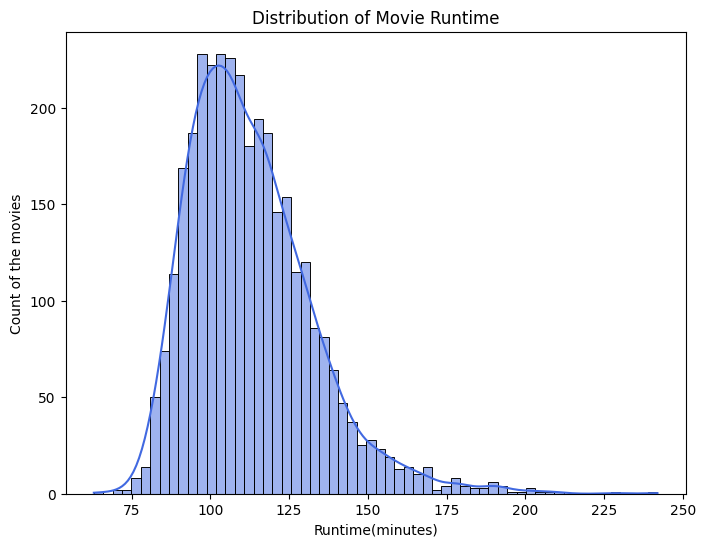

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['runtimeMinutes'], bins=60, kde=True, color='royalblue')
plt.xlabel("Runtime(minutes)")
plt.ylabel("Count of the movies")
plt.title("Distribution of Movie Runtime")

In [22]:
#as we see the distribution. it seems like normal distribution. but lets check for the outliers also

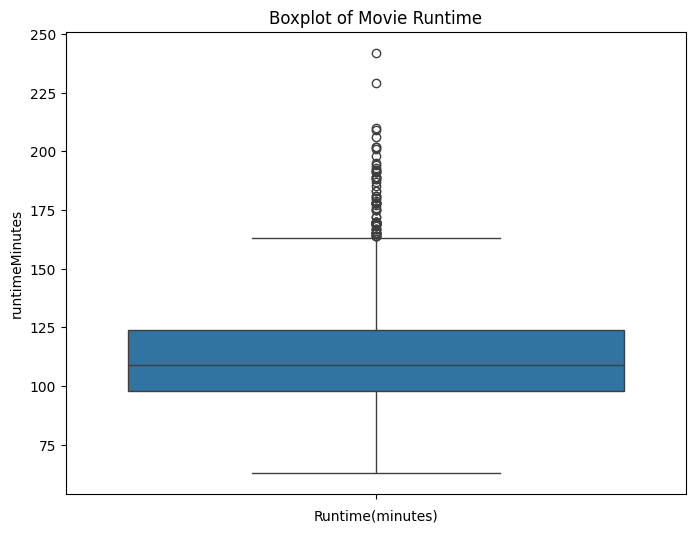

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(df['runtimeMinutes'])
plt.xlabel("Runtime(minutes)")
plt.title("Boxplot of Movie Runtime")
plt.savefig("Runtime.png", dpi=300)

In [24]:
#lets check How many movies are marked as "Adult" (isAdult=1) vs. non-adult (isAdult=0)?

In [25]:
df['isAdult'].unique()

array([0])

- as weseen we have only one category in adult section.

- that mean all movies is only for Adult

- so for better analysis we drop the adult column

In [26]:
df.drop(columns=['isAdult'], inplace=True)

In [27]:
#What are the top 10 most common movie genres?

In [28]:
df.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [29]:
genres_list = df['genres'].str.split(",").explode()

In [30]:
genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [31]:
genres_counts = genres_list.value_counts().head(10)

In [32]:
genres_counts

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


<ipython-input-33-4d1000c1601d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')


Text(0, 0.5, 'Number of movies')

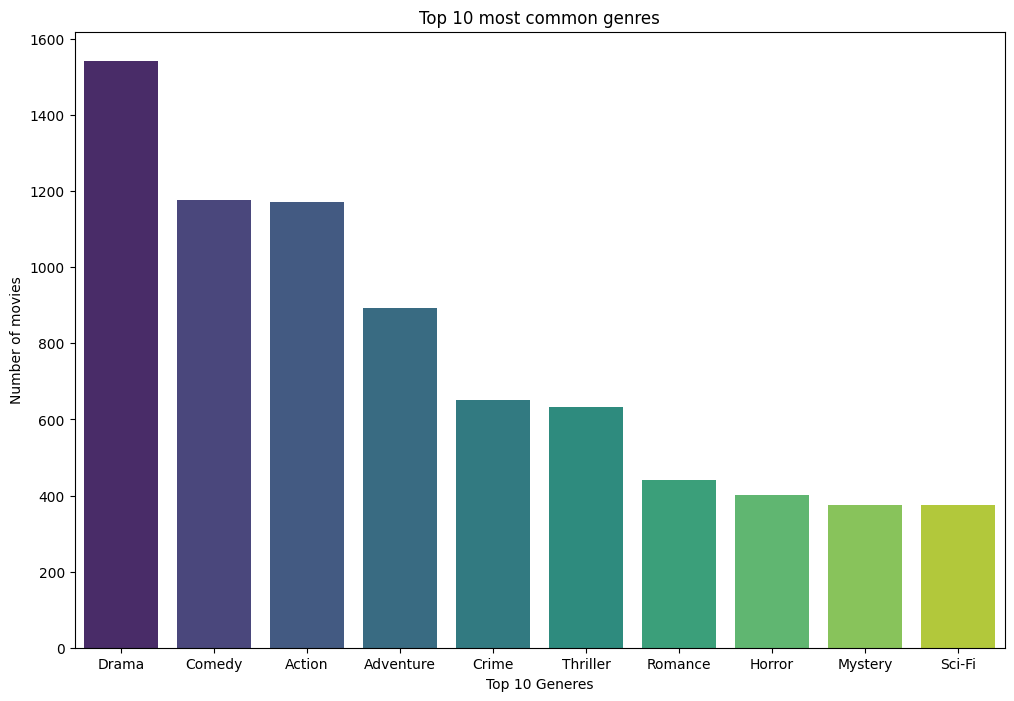

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')
plt.title("Top 10 most common genres")
plt.xlabel("Top 10 Generes")
plt.ylabel("Number of movies")

- Drama is the most dminant genre with 1542 movies

-comedy and action are almost eqal ~ 1170

- Adventure , crime and thriller are strong contenders -

-romance , horror, mystery an si-fi are mid tier genres.

In [34]:
#What is the distribution of averageRating? Are ratings skewed toward high or low values?

In [35]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Average Rating')

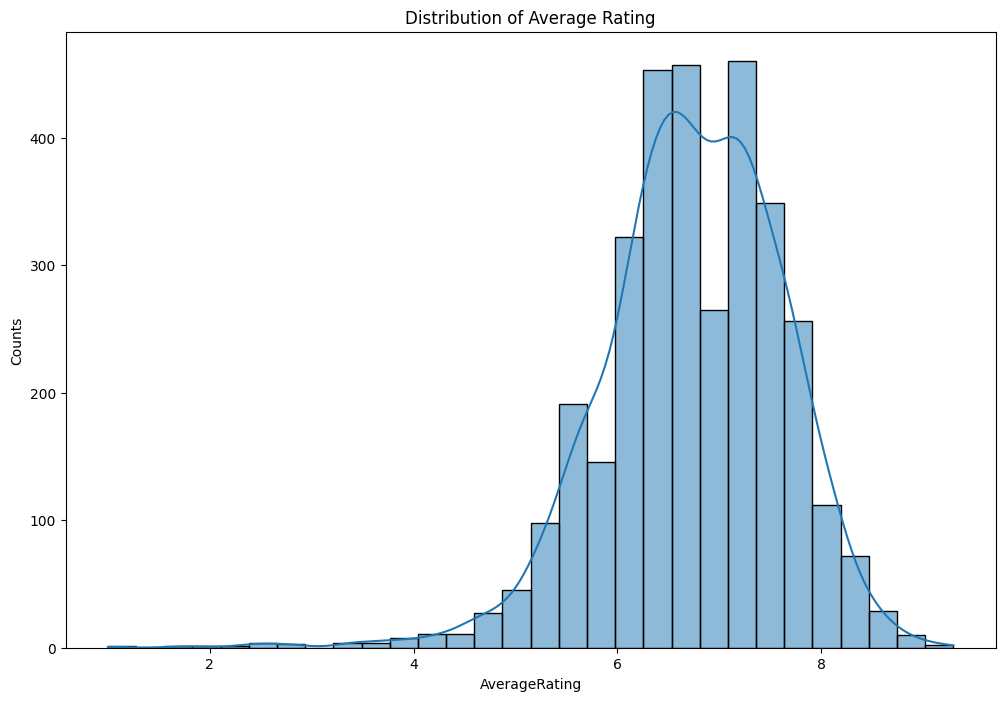

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df['averageRating'], bins = 30, kde=True)
plt.xlabel("AverageRating")
plt.ylabel("Counts")
plt.title("Distribution of Average Rating")

In [37]:
#lets see how many movies are very low and very high rated

Text(0.5, 1.0, 'Boxplot of average rating')

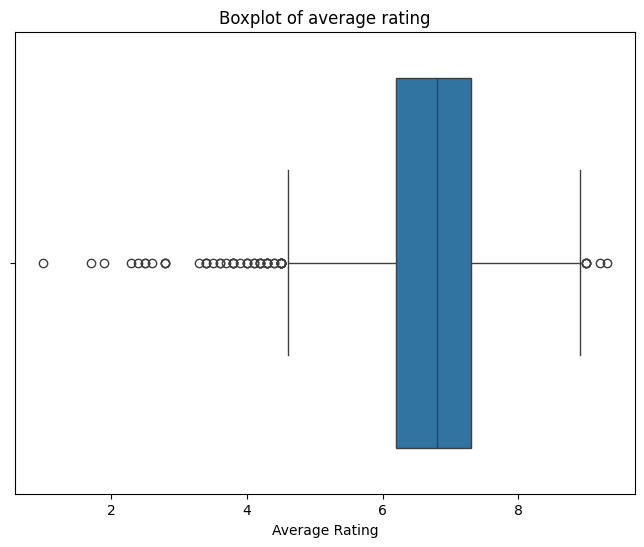

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['averageRating'])
plt.xlabel("Average Rating")
plt.title("Boxplot of average rating")

- Most movies are well rated

- The majority of rating are above 6  to 8 indicating positive bias in user reviews.

-some movies are high rated movies. looks like outliers.

-there are fewer low rated movies, looks outlier, meaning people dontbother to rate them. low rated movies. - prabalely disliked by audiences.

In [39]:
#How many movies have received over 100,000 votes (numVotes > 100,000)?

In [40]:
high_vote_movies = df[df['numVotes']>100000]

In [41]:
high_vote_movies.shape

(2099, 11)

Text(0.5, 1.0, 'Distribution of movies votes')

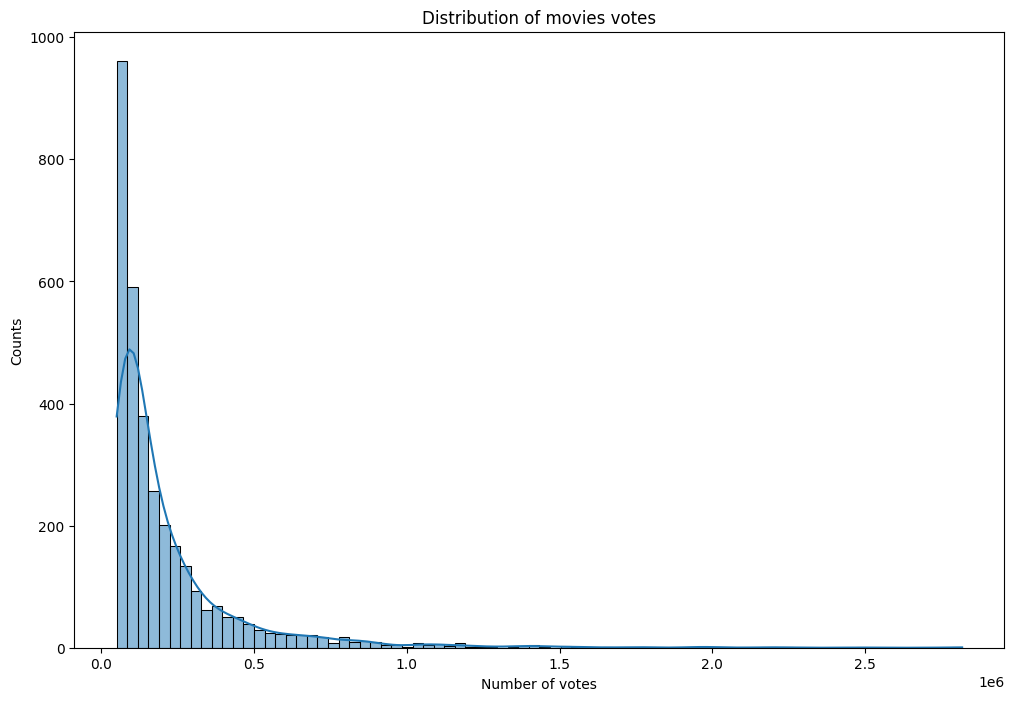

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(df['numVotes'], bins = 80, kde= True)
plt.xlabel("Number of votes")
plt.ylabel("Counts")
plt.title("Distribution of movies votes")

In [43]:
#7. What is the distribution of movie budgets?

Text(0.5, 1.0, 'Distribution of Movies Budget')

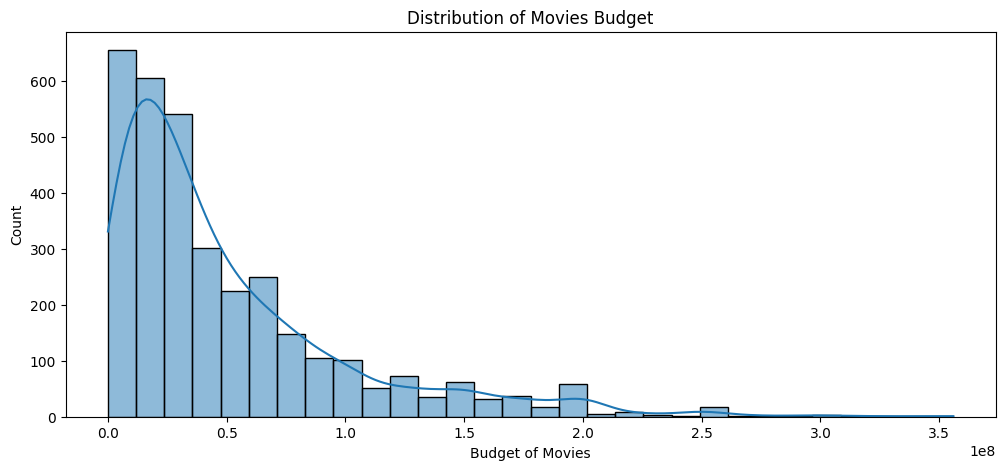

In [44]:
plt.figure(figsize=(12,5))
sns.histplot(df['budget'], bins = 30, kde=True)
plt.xlabel("Budget of Movies")
plt.ylabel("Count")
plt.title("Distribution of Movies Budget")

- the budget distriution id right skewed

- many movies had low budget movies

- few movies only had high budgets

Text(0.5, 1.0, 'Boxplot of Movies Budget')

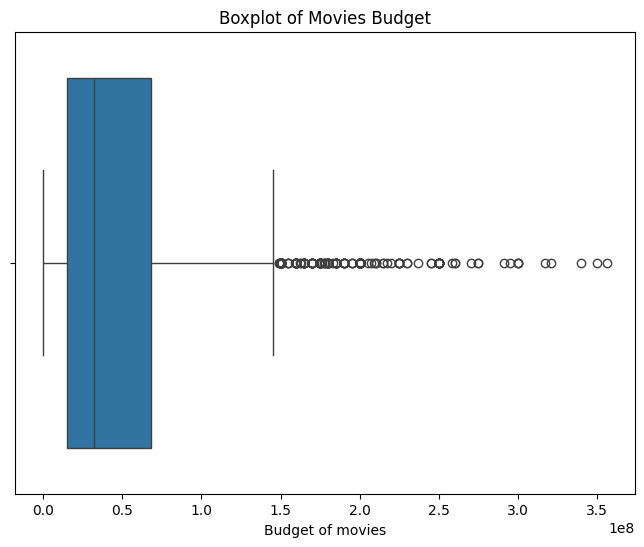

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['budget'])
plt.xlabel("Budget of movies")
plt.title("Boxplot of Movies Budget")

In [46]:
#. What is the distribution of gross revenue?

In [47]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Movies Gross Revenue')

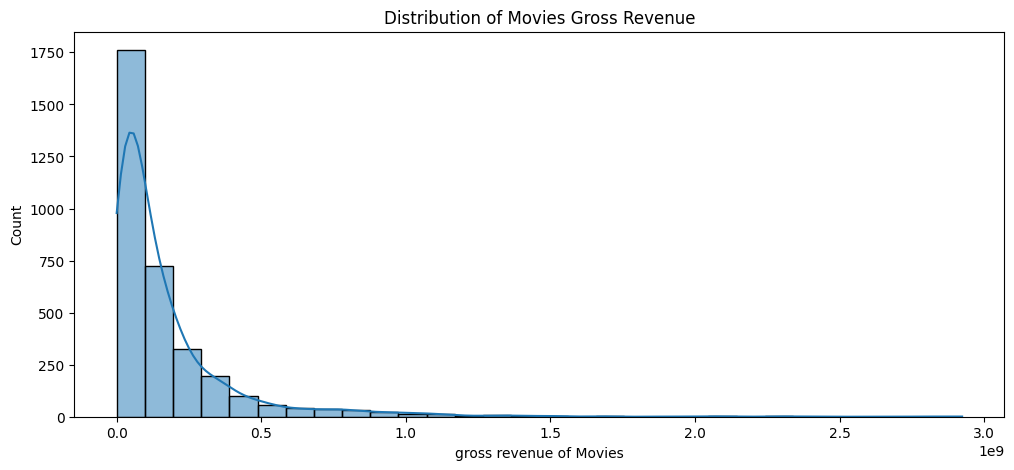

In [48]:
plt.figure(figsize=(12,5))
sns.histplot(df['gross'], bins = 30, kde=True)
plt.xlabel("gross revenue of Movies")
plt.ylabel("Count")
plt.title("Distribution of Movies Gross Revenue")

Text(0.5, 1.0, 'Boxplot of Movies gross revenue')

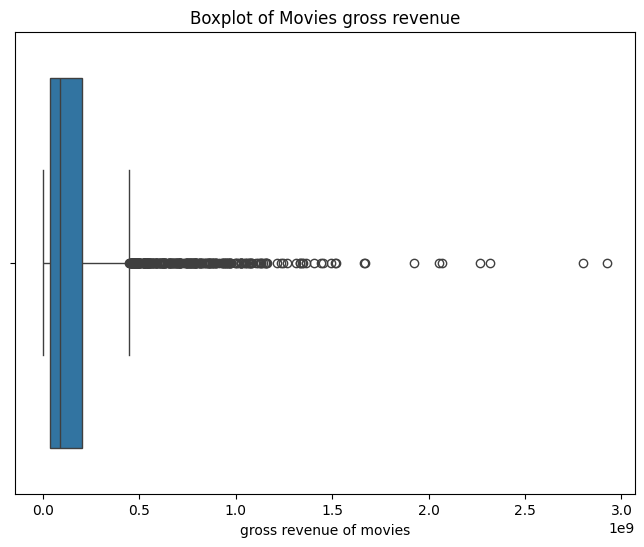

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['gross'])
plt.xlabel("gross revenue of movies")
plt.title("Boxplot of Movies gross revenue")

- gross revenue distribution is right skewed

- a few blockbuster movies earning massive amount

- there outliers movies with extream earnings.

In [50]:
#What is the average budget and gross revenue of movies?

In [51]:
avg_budget = df['budget'].mean()

In [52]:
avg_gross = df['gross'].mean()

In [53]:
avg_budget

np.float64(50425817.86299731)

In [54]:
avg_gross

np.float64(167729001.37349686)

<ipython-input-55-e3e0ed8b6028>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['avg_budget', 'avg_gross'],


Text(0.5, 1.0, 'Comparision of average budget vs. gross')

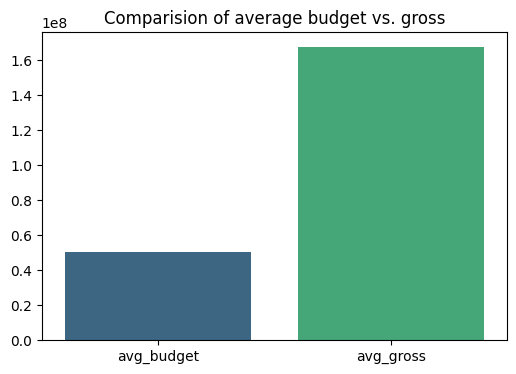

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(x=['avg_budget', 'avg_gross'],
            y = [avg_budget, avg_gross], palette='viridis')
plt.title("Comparision of average budget vs. gross")

- average gross exceed the average budget, indicating overall profitability

In [56]:
#. Is there a significant correlation between budget and gross revenue?

In [59]:
correlatio_matrix = df[["budget", "gross"]].corr()

In [60]:
correlatio_matrix

,budget,gross
budget,1.000000,0.699016
gross,0.699016,1.000000


Text(0.5, 1.0, 'Correlation betw. budget and gross revenue')

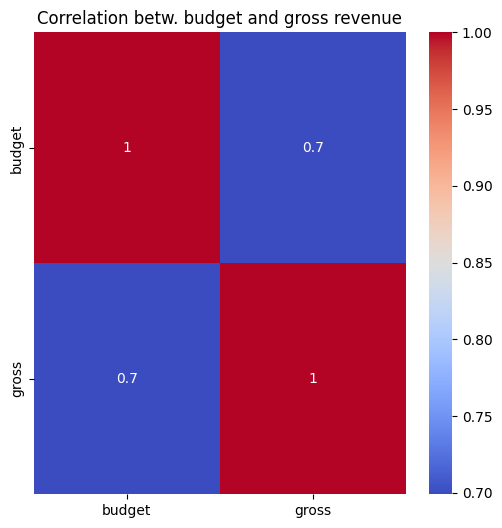

In [61]:
plt.figure(figsize=(6,6))
sns.heatmap(correlatio_matrix,annot=True, cmap="coolwarm" )
plt.title("Correlation betw. budget and gross revenue")

- strong positive correlation ~ 0.699 between budget and gross revenue.

- this means higher budget movies tends to greater higher revenue.

In [62]:
# Do high-budget movies tend to have higher ratings?

In [63]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

In [64]:
correlatio_matrix = df[["budget", "averageRating"]].corr()

In [65]:
correlatio_matrix

,budget,averageRating
budget,1.000000,-0.079107
averageRating,-0.079107,1.000000


Text(0.5, 1.0, 'Correlation betw. budget and average rating')

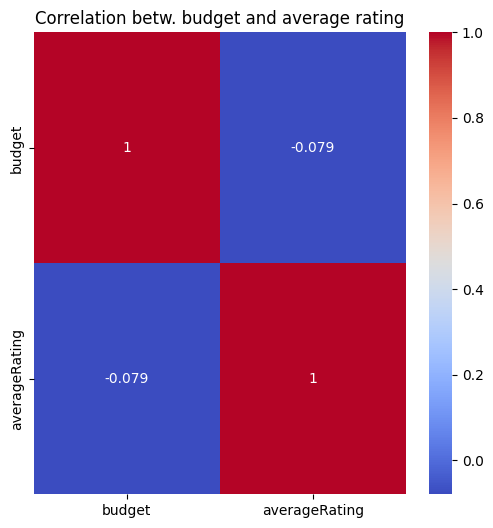

In [66]:
plt.figure(figsize=(6,6))
sns.heatmap(correlatio_matrix,annot=True, cmap="coolwarm" )
plt.title("Correlation betw. budget and average rating")

- weak negative correlation ~ -0.079

- suggest almost no relationship between budget and average rating


In [67]:
#Which are the top 10 highest-grossing movies?

In [77]:
top_grossing = df[["primaryTitle","gross"]].sort_values(by='gross', ascending= False).head(10)

In [78]:
top_grossing

,primaryTitle,gross
1762,Avatar,2.923706e+09
3055,Avengers: Endgame,2.799439e+09
2514,Avatar: The Way of Water,2.320250e+09
726,Titanic,2.264743e+09
2850,Star Wars: Episode VII - The Force Awakens,2.071310e+09
3054,Avengers: Infinity War,2.052415e+09
2051,Spider-Man: No Way Home,1.921847e+09
1368,Jurassic World,1.671537e+09
3201,The Lion King,1.663075e+09
1859,The Avengers,1.520539e+09


<ipython-input-87-2c416fba6c9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_grossing["gross"], y =top_grossing['primaryTitle'], palette="viridis")


Text(0.5, 1.0, 'Top 10 Highest grossing movies')

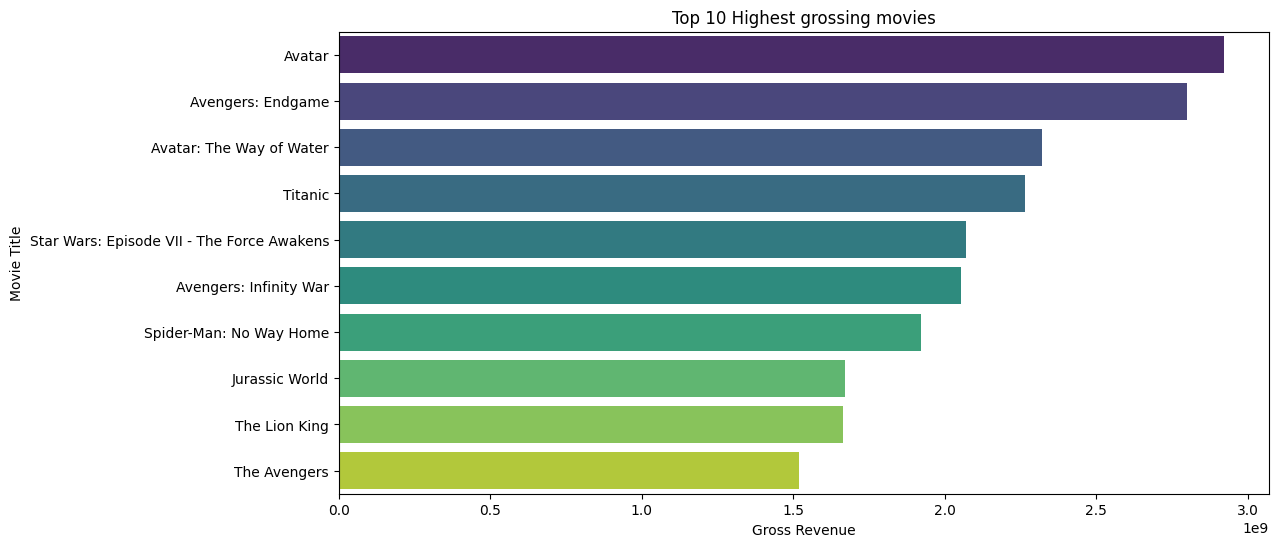

In [87]:
plt.figure(figsize=(12,6))
sns.barplot(x= top_grossing["gross"], y =top_grossing['primaryTitle'], palette="viridis")
plt.xlabel("Gross Revenue")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest grossing movies")


In [80]:
#Which are the top 10 most profitable movies (profit = gross - budget)?

In [81]:
df['profit'] = df['gross'] - df['budget']

In [85]:
top_profitable = df.sort_values(by ='profit', ascending= False).head(10)

In [86]:
top_profitable

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
1762,tt0499549,Avatar,Avatar,162,"Action,Adventure,Fantasy",7.9,1364568,237000000.0,2.923706e+09,"December 10, 2009",James Cameron,2.686706e+09
3055,tt4154796,Avengers: Endgame,Avengers: Endgame,181,"Action,Adventure,Drama",8.4,1224453,356000000.0,2.799439e+09,"April 18, 2019","Anthony Russo, Joe Russo",2.443439e+09
726,tt0120338,Titanic,Titanic,194,"Drama,Romance",7.9,1252486,200000000.0,2.264743e+09,"November 1, 1997",James Cameron,2.064743e+09
2514,tt1630029,Avatar: The Way of Water,Avatar: The Way of Water,192,"Action,Adventure,Fantasy",7.6,466743,350000000.0,2.320250e+09,"December 6, 2022",James Cameron,1.970250e+09
2850,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,138,"Action,Adventure,Sci-Fi",7.8,960165,245000000.0,2.071310e+09,"December 14, 2015",J.J. Abrams,1.826310e+09
3054,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149,"Action,Adventure,Sci-Fi",8.4,1164767,321000000.0,2.052415e+09,"April 23, 2018","Anthony Russo, Joe Russo",1.731415e+09
2051,tt10872600,Spider-Man: No Way Home,Spider-Man: No Way Home,148,"Action,Adventure,Fantasy",8.2,841498,200000000.0,1.921847e+09,"December 13, 2021",Jon Watts,1.721847e+09
1368,tt0369610,Jurassic World,Jurassic World,124,"Action,Adventure,Sci-Fi",6.9,668305,150000000.0,1.671537e+09,"May 29, 2015",Colin Trevorrow,1.521537e+09
3201,tt6105098,The Lion King,The Lion King,118,"Adventure,Animation,Drama",6.8,260956,260000000.0,1.663075e+09,"July 9, 2019",Jon Favreau,1.403075e+09
2427,tt1517268,Barbie,Barbie,114,"Adventure,Comedy,Fantasy",7.0,376979,100000000.0,1.441660e+09,"July 9, 2023",Greta Gerwig,1.341660e+09


<ipython-input-90-43c39d51a041>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_profitable["profit"], y =top_profitable['primaryTitle'], palette="viridis")


Text(0.5, 1.0, 'Top 10 Highest profitable movies')

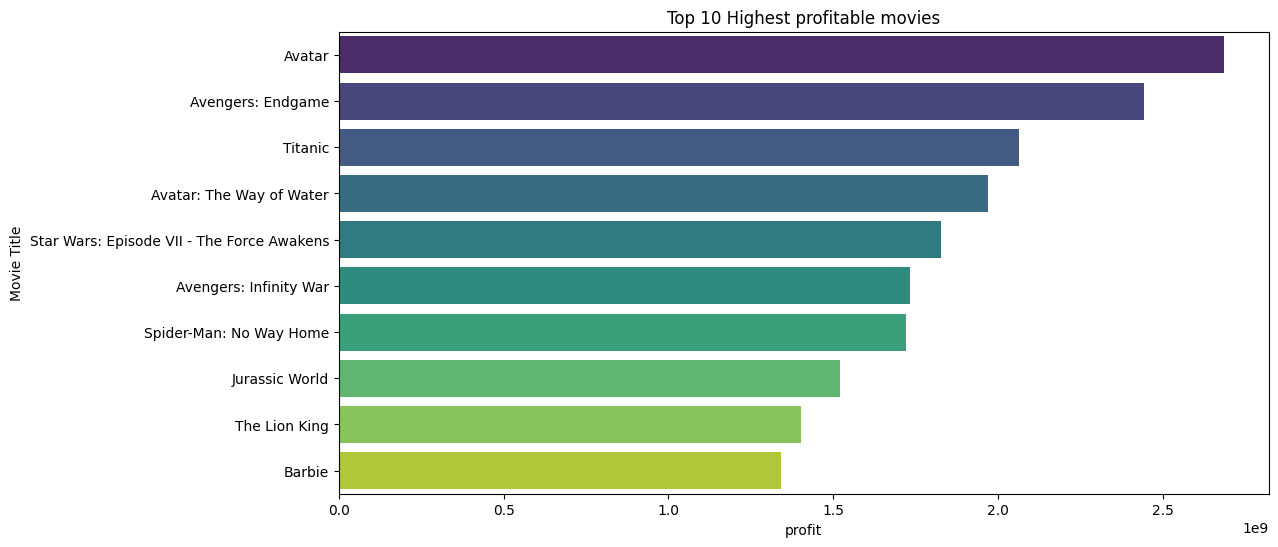

In [90]:
plt.figure(figsize=(12,6))
sns.barplot(x= top_profitable["profit"], y =top_profitable['primaryTitle'], palette="viridis")
plt.xlabel("profit")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest profitable movies")


In [91]:
#4. Are movies with a higher number of votes (numVotes) more profitable?

In [92]:
correlatio_matrix = df[["numVotes", "profit"]].corr()

In [93]:
correlatio_matrix

,numVotes,profit
numVotes,1.000000,0.528258
profit,0.528258,1.000000


Text(0.5, 1.0, 'Correlation betw. numVotes and Profit')

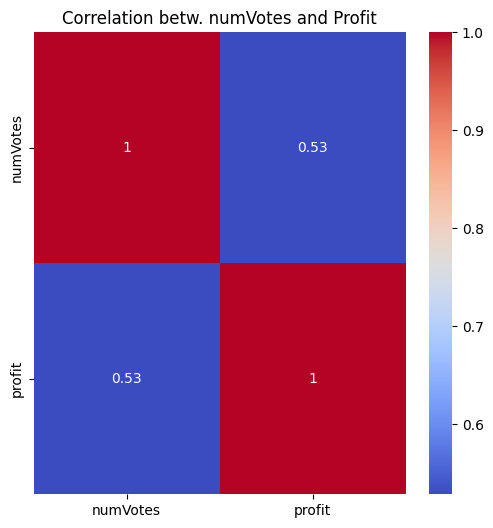

In [94]:
plt.figure(figsize=(6,6))
sns.heatmap(correlatio_matrix,annot=True, cmap="coolwarm" )
plt.title("Correlation betw. numVotes and Profit")

- The correlation bet. number of votes and profit is 0.53 which indicates a moderate positive correlation.
